# scikit-learn实现cart分类树

目前scikit-learn能实现的树: cart分类树,cart回归树,且自变量x不能是多分类的数据

In [64]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
import os
import numpy as np

- 需要安装graphviz包,通过此包中的函数绘制树图
- 安装使用conda install python-graphviz
- 也可从官网安装:graphviz[官网](http://www.graphviz.org):可以[下载](https://graphviz.gitlab.io/_pages/Download/Download_windows.html)安装包
- 如果输出有问题参考[此贴](https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft)

In [2]:
os.chdir("D:/data/python")
# 设置工作路径
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
# 加载数据,自变量给X,因变量给y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)
# 分训练集和测试集

In [10]:
clf = tree.DecisionTreeClassifier()
# 使用scikit-learn的决策树分类模型
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

- DecisionTreeClassifier参数:
    - criterion: 属性选择算法,默认:"gini"表示基尼不纯度,可用"entropy"表示信息熵,两种算法类似,信息熵运算效率略低
    - splitter:结点选择属性的策略,默认"best":选择最优分割属性;"random"从排名靠前的属性中随机选择
    - max_depth:树的最大深度,即层数,默认为None,也可以给整数
    - min_samples_split:内部结点包含的观测数最小值(即能创建分支的节点包含的最小观测数),默认为2,可以是整数表示最少包含几行数据,也可以是浮点数表示占比
    - min_samples_leaf:叶节点包含的最小观测数(即分支后的子节点包含的最小观测数),默认为1,可以是整数和浮点数,表示含义同上
    - max_leaf_node:节点个数的最大值
    - min_impurity_decrease:不纯度(信息熵)下降的阈值,只有当下降值大于阈值的时候才分支,用于前剪枝策略.版本0.19的新参数,对应的旧参数名为:min_impurity_split
    - presort:是否对数据排序以提高寻找最优分割点的效率,默认为False,大数据集设置为True会降低训练速度,小数据集设置为True会提速
    - 更多其他参数查看[帮助文件](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)(主要是样本加权相关参数)
- 函数返回结果包含的属性:
    - classes_:y的类别标签
    - n_classes_:类别标签的个数
    - feature_importances:属性重要性的列表
    - n_features_:属性个数
    - n_outputs_:输出个数
    - tree_:存储整个树结构,可以抽出如下属性,详情[参考](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py),其中-2(或-1)表示叶节点
        - node_count:树的结点个数
        - children_left:所在位置节点对应左节点的id值,所有节点从0开始计数,每个节点对应一个id,计数规则从左分支到右分支,-1表示叶节点
        - children_right:所在位置节点对应右节点的id值,-1表示叶节点
        - feature:每个结点对应的属性索引值,-2表示叶节点
        - threshold:每个结点对应的分割值(-2表示叶节点)

In [30]:
print(f"feature_importance:{clf.feature_importances_}")
# 查看属性重要性
print(f"""Tree Structure:
number of node: {clf.tree_.node_count}
each node's left children id: {clf.tree_.children_left}
node's corresponding feature: {clf.tree_.feature}
node's corresponding spliting value: 
{clf.tree_.threshold.reshape(-1,1)}""")
# 从上到下依次查看:节点个数,每个节点左节点对应id
# 每个节点对应属性索引,每个节点的分割值

feature_importance:[0.01250782 0.03001876 0.90481856 0.05265486]
Tree Structure:
number of node: 17
each node's left children id: [ 1 -1  3  4 -1  6 -1 -1  9 10 11 -1 13 -1 -1 -1 -1]
node's corresponding feature: [ 2 -2  2  3 -2  1 -2 -2  3  1  3 -2  0 -2 -2 -2 -2]
node's corresponding spliting value: 
[[ 2.44999999]
 [-2.        ]
 [ 4.85000014]
 [ 1.65000004]
 [-2.        ]
 [ 3.10000002]
 [-2.        ]
 [-2.        ]
 [ 1.69999999]
 [ 3.04999995]
 [ 1.55000001]
 [-2.        ]
 [ 6.5999999 ]
 [-2.        ]
 [-2.        ]
 [-2.        ]
 [-2.        ]]


In [5]:
print(f"train score: {clf.score(X_train,y_train)}")
print(f"test score: {clf.score(X_test,y_test)}")
# 打印训练集和测试集的分数

train score: 1.0
test score: 0.9333333333333333


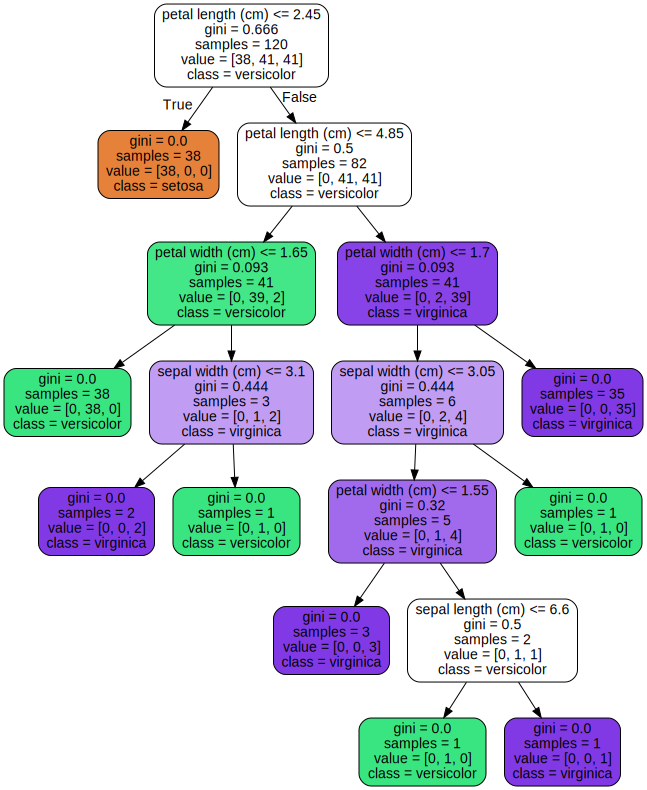

In [40]:
dot = tree.export_graphviz(clf,out_file=None,
                          feature_names=iris.feature_names,
                          class_names=iris.target_names,
                          filled=True,rounded=True)
# 生成一个DOT格式的决策树
graph = graphviz.Source(dot)
# 使用graphviz逐字渲染dot对象
graph.render("iris")
# 在当前工作路径输出iris.pdf的文件
graph
# 显示图形

- export_graphviz生成一个DOT格式的决策树：
    - out_file:输出的dot文件的名字,默认为None表示不输出文件,可以是自定义名字如"tree.dot"
    - feature_names:每个属性的名字
    - class_names:每个因变量类别的名字
    - label:是否显示不纯度信息的标签,默认为"all"表都显示,可以是"root"或"none"
    - filled:是否给每个结点的主分类绘制不同的颜色,默认为False
    - rounded:默认为Ture,表示对每个结点的边框加圆角,并使用Helvetica字体
    - 更多参数说明查看[帮助文件](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz)

# scikit-learn实现cart回归树

In [75]:
from sklearn.datasets import load_boston
# 加载boston数据函数
from sklearn.model_selection import cross_val_score
# 加载交叉验证的函数
from sklearn.model_selection import train_test_split
boston = load_boston()
X = boston.data
y = boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)
# 定义自变量和因变量数据,分训练集和测试集

In [80]:
from sklearn.model_selection import GridSearchCV
# 加载调优函数
gini_impure = np.linspace(0,0.01,50)
# 设置参数可取值
param_grid = {"min_impurity_decrease":gini_impure,
             "max_depth":range(2,10),
             "min_samples_split":range(2,30,2)}
# 设置参数网格
reg = GridSearchCV(tree.DecisionTreeRegressor(),param_grid,cv=5,iid=False)
# 建模
reg.fit(X_train,y_train)
# 拟合训练集数据
print(f"best params: {reg.best_params_}")
print(f"best score: {reg.best_score_}")
# 打印结果

best params: {'max_depth': 7, 'min_impurity_decrease': 0.005714285714285714, 'min_samples_split': 2}
best score: 0.8147177037588655


In [81]:
reg = tree.DecisionTreeRegressor(max_depth=7,
                                 min_impurity_decrease=0.0057,
                                 min_samples_split=2)
# 加载模型
reg.fit(X_train,y_train)
# 拟合数据
print(f"train score: {reg.score(X_train,y_train)}")
print(f"test score: {reg.score(X_test,y_test)}")
# 查看训练集和测试集的分数

train score: 0.9659168115022326
test score: 0.8511460357384384


In [83]:
dot = tree.export_graphviz(reg,out_file=None,
                          feature_names=boston.feature_names,
                          filled=True,rounded=True)
# 生成一个DOT格式的决策树
graph = graphviz.Source(dot)
# 使用graphviz逐字渲染dot对象
graph.render("boston")
# 生成对应的图形文件boston.pdf

'boston.pdf'